# Homework 3 

# Задача №1 - Лес или пустыня?

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь.

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/nmHHctW/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/dM77C4b/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [1]:
# Ваш код
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def determine(img: np.ndarray) -> str:
    """
    Determine whether it is a forest or a desert on an image.
    
    \param img: image in RGB format
    
    \return res: string that contains required information
    
    \details If there's more green on image than yellow - it's forest.
    \details If there's more yellow on image than green - it's desert.
    """
    res = ""
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    green_lower = (40, 40,40) 
    green_upper = (70, 255,255)

    yellow_lower = (10, 70, 100)
    yellow_upper = (30, 255, 255)

    mask_green = cv2.inRange(hsv, green_lower, green_upper)
    mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)
    
    green_likelihood = np.count_nonzero(mask_green)
    yellow_likelihood = np.count_nonzero(mask_yellow)
    
    if green_likelihood > yellow_likelihood:
        res = "Forest"
    elif green_likelihood < yellow_likelihood:
        res = "Desert"
    else: # unlikely to happen in standard conditions
        res = "Unable to determine. Consult a specialist."
    
    return res

In [3]:
img = cv2.imread("desert_forest/test_image_00.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

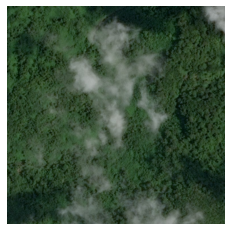

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
result = determine(img)
print(result)

Forest


In [6]:
# Проверим на всех примерах
images = np.array([cv2.imread(f"desert_forest/test_image_{i:02}.jpg") for i in range(16)])
for idx in range(len(images)):
    images[idx] = cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB)

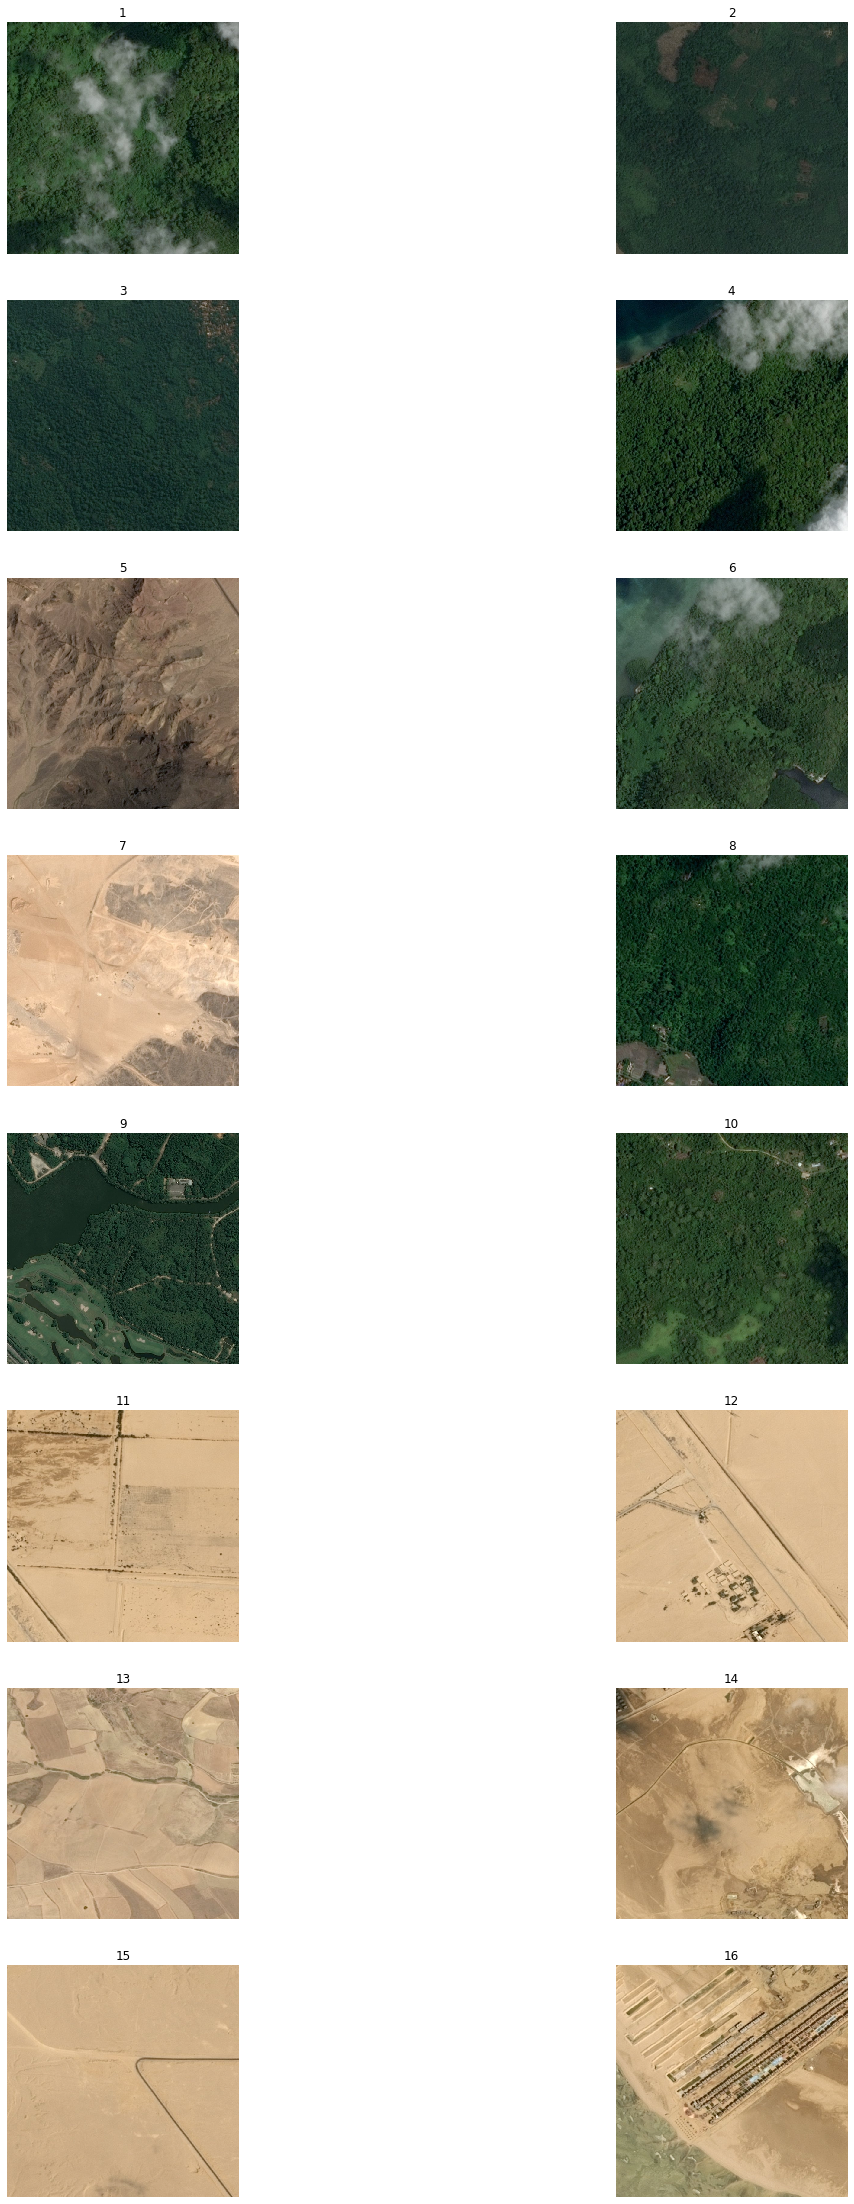

In [7]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))

for i, (axis, image) in enumerate(zip(axes.flat, images)):
    axis.imshow(image, interpolation = 'none')
    axis.axis('off')
    axis.set_title(i + 1)

In [8]:
for i, image in enumerate(images):
    result = determine(image)
    print(f"{i + 1}: {result}", end = '\n\n')

1: Forest

2: Forest

3: Forest

4: Forest

5: Desert

6: Forest

7: Desert

8: Forest

9: Forest

10: Forest

11: Desert

12: Desert

13: Desert

14: Desert

15: Desert

16: Desert



# Задача №2 - Кусочки пазла.

Даны кусочки изображения, ваша задача склеить пазл в исходную картинку. 

Условия:
* Дано исходное изображение для проверки, использовать собранное изображение в самом алгоритме нельзя;
* Картинки имеют друг с другом пересечение;
* После разрезки кусочки пазлов не были повернуты или отражены;
* В качестве первого изображения, начиная с которого нужно собрать пазл, всегда принимается верхняя левая часть изображения;
* В процессе проверки решения пазлы могут быть перемешаны, т.е. порядок пазлов в проверке может отличаться от исходного 

Примеры изображений:
<img src="https://i.ibb.co/H78VtDb/image.jpg" alt="Drawing" style="width: 300px;"/>
<table><tr>
    <td> <img src="https://i.ibb.co/Yh1dvJ8/image_part_002.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/N9sCpjH/image_part_001.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/jf1jGgD/image_part_004.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/kBGYb8s/image_part_003.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [98]:
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return np.array(images)

In [120]:
images = load_images_from_folder('puzzle/sy_cut')
orig = images[0]
images = images[1:]
print(images.shape)


(4,)


Гиперпараметры:
- ```def_width```
- ```def_height```
- ```i```
- ```j```

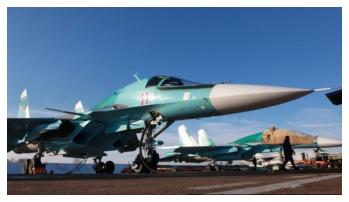

In [123]:
def_height = 20
def_width = 40
max_corr = list()

for image0, image1 in zip(images[:-1], images[1:]):
    image0 = cv2.cvtColor(image0, cv2.COLOR_RGB2GRAY)
    image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

    height = def_height
    width = def_width
    
    topleft = image1[:height, :width]
    topright = image1[:height, -width:]
    bottomleft = image1[-height:, :width]
    bottomright = image1[-height:, -width:]

    match_tl = cv2.matchTemplate(image0, topleft, method = cv2.TM_CCOEFF_NORMED)
    match_tr = cv2.matchTemplate(image0, topright, method = cv2.TM_CCOEFF_NORMED)
    match_bl = cv2.matchTemplate(image0, bottomleft, method = cv2.TM_CCOEFF_NORMED)
    match_br = cv2.matchTemplate(image0, bottomright, method = cv2.TM_CCOEFF_NORMED)
    
    idx_tl = np.unravel_index(np.argmax(match_tl, axis=None), match_tl.shape)
    idx_tr = np.unravel_index(np.argmax(match_tr, axis=None), match_tr.shape)
    idx_bl = np.unravel_index(np.argmax(match_bl, axis=None), match_bl.shape)
    idx_br = np.unravel_index(np.argmax(match_br, axis=None), match_br.shape)
    
    maximum = max((match_tl[idx_tl], idx_tl, 'tl'), 
                  (match_tr[idx_tr], idx_tr, 'tr'),
                  (match_bl[idx_bl], idx_bl, 'bl'),
                  (match_br[idx_br], idx_br, 'br'),
                  key = lambda i: i[0])
    max_corr.append(maximum)

big_arr = np.zeros((orig.shape[0], orig.shape[1], 3), dtype = np.float64)

# Topleft coordinate of the last image
i, j = 0, 0
big_arr[i: i + images[0].shape[0], j:j + images[0].shape[1]] = images[0]
for k, image1 in enumerate(images[1:]):
    if max_corr[k][2] == 'tl':
        i, j = i + max_corr[k][1][0], j + max_corr[k][1][1]
    elif max_corr[k][2] == 'tr':
        i, j = i + max_corr[k][1][0], j + max_corr[k][1][1] - (image1.shape[1] - def_width)
    elif max_corr[k][2] == 'bl':
        i, j = i + max_corr[k][1][0] - (image1.shape[0] - def_height), j + max_corr[k][1][1]
    else:
        i, j = i + max_corr[k][1][0] - (image1.shape[0] - def_height), j + max_corr[k][1][1] - (image1.shape[1] - def_width)
    
    big_arr[i:i + image1.shape[0], j: j + image1.shape[1]] = image1

big_arr = (big_arr - big_arr.min())/(big_arr.max() - big_arr.min())
plt.imshow(big_arr)
plt.axis('off')
plt.show()

# Задача №3 - Найди клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="../img/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

__Доп вопрос__ - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

Wall time: 257 ms


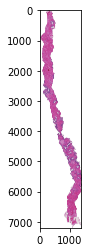

In [12]:
%%time
# Ваш код
img = cv2.cvtColor(cv2.imread('cells/train1_1.jpeg'), cv2.COLOR_BGR2RGB)

size = 300 # Линейный размер ячейки
subimg_num = 25 # Количество ячеек
white = 255
_, img_bin = cv2.threshold(img, white - 10, 255, cv2.THRESH_BINARY_INV)
img_bin = cv2.cvtColor(img_bin, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [9]:
%%time
sub_images = np.zeros((subimg_num, size, size, 3))
cur_subimg_num = 0
accepted =  (size ** 2) // 2
minimum = (size ** 2) // 10
i, j = 0, 0
while i + size < img_bin.shape[0] and cur_subimg_num < subimg_num:
    nonzero = np.count_nonzero(img_bin[i: i + size, j: j + size])
    if minimum <= nonzero < accepted:
        j += 1
    else:
        if nonzero >= accepted:
            sub_images[cur_subimg_num] = img[i:i + size, j: j + size]
            cur_subimg_num += 1
        j += size
        if j >= img_bin.shape[1]:
            j = 0
            i += size

Wall time: 322 ms


Wall time: 126 ms


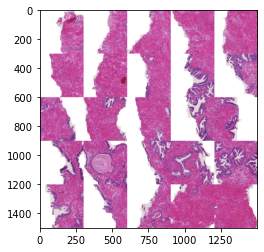

In [10]:
%%time
subnum_sqrt = np.sqrt(subimg_num).astype(int)
res_img = np.zeros((subnum_sqrt * size, subnum_sqrt * size, 3))
for i in range(subnum_sqrt):
    for j in range(subnum_sqrt):
        sub_image = sub_images[i * subnum_sqrt + j]
        sub_image = (sub_image - sub_image.min())/(sub_image.max() - sub_image.min())
        print
        res_img[i * size : (i + 1) * size, j * size: (j + 1) * size] = sub_image
    
plt.imshow(res_img)